In [1]:
# LOAD MODULES
from IPython.core.display import display, HTML # for max width
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from spacy.tokens import Doc, Span, Token
import scattertext as st
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import spatial
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
import spacy # software for analysing text
from spacy import displacy
nlp = spacy.load('en_core_web_lg') # a medium english language model
import warnings
warnings.filterwarnings('ignore')

# LOAD FUNCTIONS
def compareMeanings(words):
    # calculate similarities
    pca = PCA(n_components=2)
    pca.fit([nlp(word).vector for word in words])
    word_vecs_2d = pca.transform([nlp(word).vector for word in words])
    
    # create plot 
    plt.figure(figsize=(10,5))
    plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
    # for each word and coordinate pair: draw the text on the plot
    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        plt.text(x, y, word, size= 15)
    # show the plot
    plt.show()
    
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")
    
def scattertextTag(tag):
    def getX(doc):
        out = [x.text for x in doc if (x.tag_ in [tag])]
        return nlp(' '.join(out))
    df['text_x'] = df['text_doc'].apply(getX)
    
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_x',
                                category_col='post_type'
                                         ).build()
    html = st.produce_scattertext_explorer(corpus,
             category='story',
             category_name='Patient Criticism',
             not_category_name='Staff Responses',
             #characteristic_scorer=None,
             alternative_text_field='post_body',
             show_characteristic=False,                              
             width_in_pixels=800)
    return html

def scattertextThemes(topics):
    topic_feature_builder = st.FeatsFromTopicModel(topics)
    
    #CREATE CORPUS
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_doc',
                                          category_col='post_type',
                                          feats_from_spacy_doc=topic_feature_builder
                                          ).build()
    
    # CREATE PLOT
    html = st.produce_scattertext_explorer(corpus,
                                          category='story',
                                          category_name='Patient Criticism',
                                          not_category_name = 'Hospital Response',
                                          width_in_pixels=600,
                                           height_in_pixels=400,
                                          show_characteristic=False,
                                           use_non_text_features=True,
                                           show_top_terms=True,
                                          minimum_term_frequency=5,
                                          use_full_doc=True,
                                          p_value_colors=True,
                                          max_snippets = 11,
                                           pmi_threshold_coefficient=0,
                                        topic_model_term_lists=topic_feature_builder.get_top_model_term_lists()
                                          )
    return html

def findSentence(sentence_subject, sentence_objecet, sentence_contains):
    if len(sentence_contains)>0:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if tok.text.lower() in sentence_contains:
                        for tok in sent:
                            if 'obj' in tok.dep_:
                                if tok.text.lower() in sentence_object:
                                    for tok in sent:
                                        if 'subj' in tok.dep_:
                                            if tok.text.lower() in sentence_subject:
                                                print(tok.sent)
                                                #displacy.render(tok.sent, jupyter=True, style='dep')
                                                break
    else:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if 'obj' in tok.dep_:
                        if tok.text.lower() in sentence_object:
                            for tok in sent:
                                if 'subj' in tok.dep_:
                                    if tok.text.lower() in sentence_subject:
                                        print(tok.sent)
                                        #displacy.render(tok.sent, jupyter=True, style='dep')
                                        break
print('Notebook loaded successfully')

Notebook loaded successfully


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#Inspirations" data-toc-modified-id="Inspirations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inspirations</a></span></li></ul></li><li><span><a href="#'AI'-&amp;-Sociocultural-Psychology??!!" data-toc-modified-id="'AI'-&amp;-Sociocultural-Psychology??!!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>'AI' &amp; Sociocultural Psychology??!!</a></span><ul class="toc-item"><li><span><a href="#Recent-Past:-Word-Frequency" data-toc-modified-id="Recent-Past:-Word-Frequency-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Recent Past: Word Frequency</a></span></li><li><span><a href="#Near-Future:-Machine-Learning-&amp;-Meaning?" data-toc-modified-id="Near-Future:-Machine-Learning-&amp;-Meaning?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Near Future: Machine Learning &amp; Meaning?</a></span></li><li><span><a href="#How-Similar-are-Words?" data-toc-modified-id="How-Similar-are-Words?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How Similar are Words?</a></span></li><li><span><a href="#How-Similar-are-Sentences?" data-toc-modified-id="How-Similar-are-Sentences?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>How Similar are Sentences?</a></span></li><li><span><a href="#Adding-and-Subtracting-Meanings?" data-toc-modified-id="Adding-and-Subtracting-Meanings?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Adding and Subtracting Meanings?</a></span></li><li><span><a href="#'Thought-Vectors'" data-toc-modified-id="'Thought-Vectors'-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>'Thought Vectors'</a></span></li></ul></li><li><span><a href="#Hospital-Staff-Responding-to-Criticism" data-toc-modified-id="Hospital-Staff-Responding-to-Criticism-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hospital Staff Responding to Criticism</a></span><ul class="toc-item"><li><span><a href="#Research-context" data-toc-modified-id="Research-context-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Research context</a></span></li><li><span><a href="#Comparing-perspectives:-words" data-toc-modified-id="Comparing-perspectives:-words-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing perspectives: words</a></span></li><li><span><a href="#Comparing-perspectives:-themes" data-toc-modified-id="Comparing-perspectives:-themes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comparing perspectives: themes</a></span></li><li><span><a href="#Which-responses-have-least-perspective-taking?" data-toc-modified-id="Which-responses-have-least-perspective-taking?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Which responses have least perspective taking?</a></span></li><li><span><a href="#Which-responses-have-most-psychological-distancing?" data-toc-modified-id="Which-responses-have-most-psychological-distancing?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Which responses have most psychological distancing?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

## Questions

My focus is the constitutive and creative potential of social interaction; which I take to be the basis of all human meaning-making.

But, dialogue, social interaction, and perspective-taking often don't lead to any meaning-making or transformation.

Thus, I'm increasingly interested in how transformative dialogue is prevented, how people ignore and dismiss one another, and how we fail to take the perspective of the other. 

I study the meeting/clash/dismissing of perspectives at two levels:
1. What are the differences of perspective in the social world?
2. How do these perspectives collide/co-exist within individuals?

## Inspirations

Classic sociocultural lineage: Peirce, Dewey, James, Mead, Bakhtin, Vygotksy, Wittgenstein, Markova, Linell <br>
<br>
But also (my focus today): Recent developments in 'natural language processing' or 'machine learning'


# 'AI' & Sociocultural Psychology??!!

Much current 'machine learning' research focuses on extracting meanings from text and image - and this is the bread and butter of sociocultural psychology. Indeed, analysis of the big data from the Hadron Colider is actually relatively straightforward compared to analysing all the text and images on the internet. Google, Facebook, etc. are investing vast resources in making computers understand text, image and sound in a way that matters for humans. 

## Recent Past: Word Frequency

To-date most psychological research using computers to analyse text has focused on word-frequency. Because the words we speak are closely connected to our thought patterns, this has produced several interesting results. For example:
- Identifying [authorship in Shakespeare's plays](http://elizabethan-theatre.org/wps/wp-content/uploads/2015/07/Double-Falsehood-by-Ryan-Boyd-Psychological-Science-2015.pdf)
- Longitudinal studies of Mayor [Giuliani's adaptation to the crisis of 9/11](https://www.sciencedirect.com/science/article/abs/pii/S0092656602923494)
- Detecting people's [personality from their writing style](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885844/?_escaped_fragment_=po=2.77778)
- Monitoring [public anxiety](https://www.tandfonline.com/doi/abs/10.1080/10410236.2011.571759) and public mood (which is [associated with stock prices](https://arxiv.org/pdf/1010.3003&))

But, all these studies are mainly using fairly basic word count techniques, or, slightly more advanced sentiment analysis.

## Near Future: Machine Learning & Meaning?

Word vectors, or 'word embeddings', developed in the late 1990s by Yoshua Bengio, Geoffrey Hinton, et al. But, only became popular in the last few years.

Before about 2013, most computational analysis of words focused on the textual appearance of a word; for example, 'dog' was close to 'god' (same letters) and 'hog' (2 letters in the same order), but far from 'cat' (no similar letters). There seemed to be no way to make computers understand that 'dog' and 'cat' are actually quite close semantically.

The breakthrough came from Wittgenstein's (1953; also Frith, 1957) insight: the meaning of words comes from the context in which they are used. Consider the sentence 'the X sat on the mat' - most people would agree that 'dog' and 'cat' are both plausible candidates for X. That is to say, 'dog' and 'cat' occupy similar roles within similar sentences. Word embeddings encode the meaning of words not in terms of the words themselves, but, in terms of the context in which the words appear. 

By analyzing billions of webpages and books, statistical models are built based on which words occur in the same context. These models _seem_ to encode meaning.

## How Similar are Words?
Most people would agree that 'dog' is more similar to 'cat' than 'road' - and the models agree:

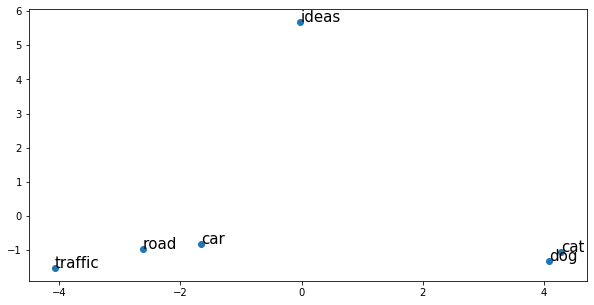

In [2]:
words = ['dog', 'cat', 'car', 'road', 'traffic', 'ideas']
    
compareMeanings(words)

## How Similar are Sentences?

We can also use these models to compare sentences. Consider the following (all using unique words). Just by averaging the word embeddings for each sentence, we can see, that the model corresponds broadly to our human judgement. <br>
<br>
Change the sentences and re-run the cell to see the result.

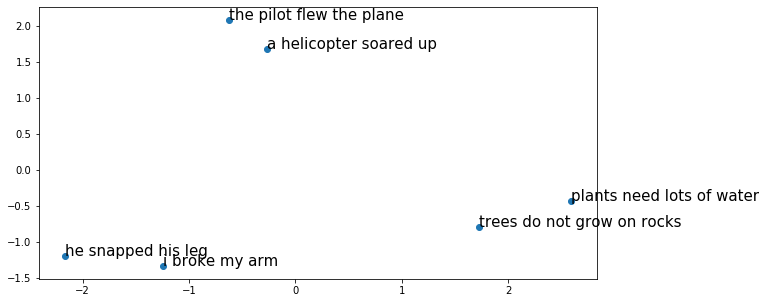

In [3]:
sentences = ['the pilot flew the plane', 
             'trees do not grow on rocks',
             'i broke my arm', 
             'he snapped his leg',
             'a helicopter soared up',
             'plants need lots of water']

compareMeanings(sentences)

Above is tiny visualisation. Google and other companies are applying similar methods to [map the meaning of all words](https://projector.tensorflow.org/) - created by analysing the sentence context in which words are used accross _all_ books, webpages, news sources and other archives.

## Adding and Subtracting Meanings?
If words are represented as numbers, then, can we do mathematics with the meanings?

What if we start with the meaning of 'king' subtract 'man' and add 'woman' - what would the outcome be?
- Try: 'uk' minus 'london' add 'geneva'
- Try: 'berlin' minus 'germany' add 'france'
- Try: 'india' minus 'curry' add 'pizza'
- Try: 'man' minus 'boy' add 'girl'
- Try: 'paris' minus 'france' add 'uk'


In [4]:
start = 'king'
subtract = 'man'
add = 'woman'

mathsOnMeaning(start, subtract, add)

'king' minus 'man' add 'woman' = queen


## 'Thought Vectors'

Geoffrey Hinton, one of the developers of 'deep learning' techniques, talks about the above examples that focus on single words as only the first step: he (and Google) are working towards 'thought vectors'. 

While the above examples represent the meanings of words in a 300 dimensional mathematical space, they aim to map thoughts, ideas, sentences, and even whole articles and books into a multi-million dimensional space.

Transcritpts, texts, and even audio-visual data will become open ho high-level semantic analysis (meaning clusters, emotion, contradictions, meta-perspectives and dialogical tensions).

- Longitudinal analyses of an individual life-course
- Comparison of perspectives of groups in conflict
- Identifying the emergence of novelty and new ideas

And, all done, on any size of dataset, in real-time, and for almost zero cost.

# Hospital Staff Responding to Criticism 
Accidents in hospitals are a leading cause of death. At least 10% of people going into hospital come out with a new health problem. Causes include: delays, hospital infections, errors, wrong-site surgery, misdiagnosis, medication errors, not reading patient notes etc. 

While aviation, construction, and heavy industry have all become much safer over the last 50 years, healthcare has remained dangerous, and seems resistant to improvement. Some hospitals have a 'blame culture' with high defensiveness.

One idea is that medical staff could learn from patients: patients know their own bodies, are usually the only person who has been at all the meetings, and have increasing access to medical knowledge.

## Research context
Question: How do healthcare staff respond to critical feedback?
    
Data: Online discussions between patients and staff in the UK (about 250k paired dialogs)
    
- What is the divergence of perspective between patients and staff?

- How are staff listening to and/or ignoring the patient point of view?

In [5]:
# loading the data
df = pd.read_csv('co_crit3.csv')
df['text_doc'] = df['post_body'].apply(nlp)
df['post_type'].value_counts()

response    326
story       326
Name: post_type, dtype: int64

## Comparing perspectives: words
The plot below compares the text of 'patient stories' with 'staff responses' in terms of past-tense verbs.
- The vertical axis is for patients; horizontal axis is for staff
- Words in the top-right are common to both patients and staff (i.e., was, were, did, had)
- Words in the top-left are peculiar to patients (i.e., took, died, called, started, tried, refused)
- Words in the bottom-right are peculiar to staff (i.e., raised, expectations, experiences, mentioned, expressed)
- Clicking on a word 'died' shows the original text (85 patient posts, 1 staff post)


In [6]:
#html = scattertextTag('VBD')
file_name = 'co_crit3_past.html'
#open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1300, height=1000)

## Comparing perspectives: themes
Based on an examination of the patient and staff text, we can formulate two ideas.

1. Patients seem to be talking about 'real' clinical issues.

2. Staff seem reluctant to address these clinical issues, and prefer to talk about 'valuing feedback' and 'patient experience'

To test these ideas, we can make some 'topic themes' that we then map into the semantic space.

In [7]:
themes = {
    'clinical': ['clinical', 'unsafe', 'doctor', 'nurse', 'operation', 'diagnosis', 'misdiagnosis'],
    'pain': ['agony', 'suffering', 'pains', 'suffer', 'screaming'],
    'feedback': ['value', 'feedback', 'learning', 'listen', 'listening'],
    'experience': ['experience', 'concern', 'concerns', 'feelings']
}

html = scattertextThemes(themes)
file_name = 'co_crit3_themes.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000, height=700)

## Which responses have least perspective taking?

Using the 'word embeddings' method the staff responses can be compared to the original patient stories. This can help identify staff responses that engage with the patient content (i.e., perspective take) and those which are generic, and ignore the content of the feedback.

In [8]:
df_index = 1
df = df.sort_values(by='similarityToOrigin', ascending=True, axis='index').reset_index(drop=True)
selected_row = df.iloc[df_index, :,]
print(f"ORIGINAL POST\n{selected_row[['thread_originText']][0]}")
print(f"STAFF RESPONSE\n{selected_row[['post_body']][0]}")

ORIGINAL POST
I was admitted in November 09 for a total thyroidectomy after being diagnosed with cancer in October (had a hemithyroidectomy in September). The surgery went well, my consultant is a great guy. Ward 21: very busy. However, I hardly dared ask anything when after requesting some pain killers, I was told rather nastily: you're not the only one 'love'; you'll have to wait! And wait I did. For an hour! 
Discharged in the middle of November, whilst complaining of feeling nauseous and tingly but 'you'll be fine' I was told. Got home feeling worse; didn't sleep as I was tingling all over and rang the ward on the next day  at 7 am to ask for advice; I was told to come back straight away before I started 'cramping' and to bring my suitcase with me. My partner drove me back but I got into such a state - fingers paralysed, unable to talk that an ambulance picked me up and rushed me in. 
Hypocalcemia: no calcium left in my body. I was re-admitted for a couple of days and given loads o

The distressed cancer patient had her glads that produce calcilum damaged during surgery resulting in paralysis and provided conflicting information about a blood clot in her brain. 

Despite the clinical error, her main concern is the rudeness of staff who have ignored her feelings.

The staff response is generic: 'Thank you for your feedback'

## Which responses have most psychological distancing?

In [9]:
sentence_subject = ['you']
sentence_object = ['experience']
sentence_contains = ['impression', 'subjective']

findSentence(sentence_subject, sentence_object, sentence_contains)

We understand that following the experience you have had you would feel that we have been uncaring and unresponsive to your concerns and we are sorry for giving you this impression.


In the above excerpt has two types of psychological distancing:

First: The distressed patient is writing about a formal complaint they have submitted to the hospital, which has been ignored, and which they cannot get any feedback on (they have tried ringing and calling). Accordingly, the patient has resorted to a public post. Despite multiple failings by the hospital (known to the hospital) the problem is described in a psychologising manner:
- 'the experience'
- 'you would feel'
- 'your concerns'
- 'this impression'

Second: The staff (as a 'we') psychologises themselves, thus distancing from implications for action
- 'we understand'
- 'we are sorry'


# Conclusion

My substantive interest is to understand the ways that people don't listen. 
- distancing (psychologising problems)
- denial (explicit and implicit ignoring topics)
- denigration (undermining the motive, stigma, expertise)
- rationalisation (individualising problems as one-off problem)

These semiotic strategies of not-listening guard the threshold between self and other, between comfort and development. If we want to understand how 'the social' leads to change, we need to understand 'semantic contact' - how alternative perspectives are accepted, rejected or modified.

But, for the purposes of our discussion, I also want to raise methodological questions:
- Is there a meeting between sociocultural psychology and NLP?
- What can NLP do for sociocultural psychology? - extra evidence, news tools, scale-up analyses?
- What can sociocultural psychology do for NLP? - conceptualizing the psychology of 'thought vectors', understanding the inherent dialogicality of language?
